In [ ]:
import pandas as pd

# Load the Iris Flower dataset.
df = pd.read_csv("Iris.csv")
print(df)

# Check for missing values in the dataset.
for col in df:
  print(f"\nNon-missing values in {col}: \n{df[col].notna()}")

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

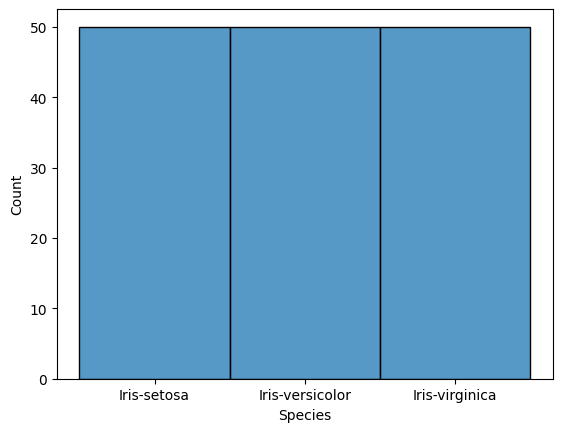

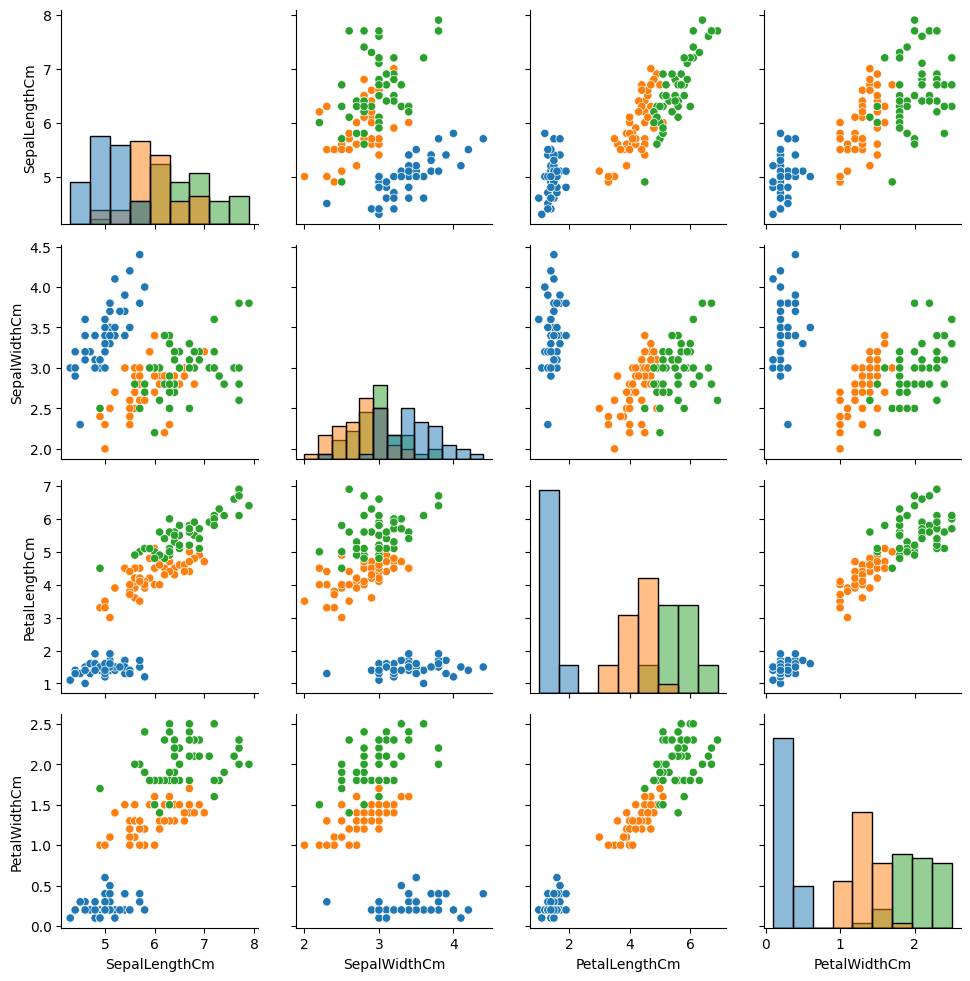

In [ ]:
import seaborn as sns

# Use a histplot to check distribution of flower species (if it is too uneven, the model might develop a bias during training).
sns.histplot(data=df, x="Species")

# Remove the "Id" column as we have no use for it.
df = df[df.columns[1:]]

# Use a scatterplot pairgrid (with a histplot diagonal one) to check each feature of the flower classes.
grid = sns.PairGrid(data=df, hue="Species")
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)

<Axes: >

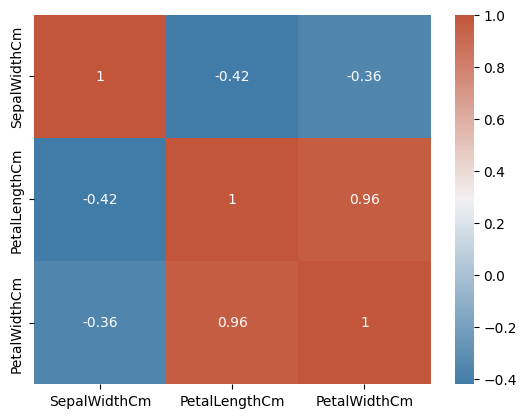

In [ ]:
# Create a correlation matrix with a heatmap.
corr = df[df.columns[1:-1]].corr()

# Generate a custom color palette for easier distinction.
c_pal = sns.diverging_palette(240, 20, as_cmap=True)

sns.heatmap(corr, cmap=c_pal, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Define variables for X and Y arrays (the former represents the petal and sepal length and width columns, the latter represents the "Species" one).
x_mtrx = df.loc[:, list(df.columns[1:-1])]
y_vec = df["Species"]
print(x_mtrx)
print(y_vec)

# Create an 80%-20% training-test split.
X_train, x_test, Y_train, y_test = train_test_split(x_mtrx, y_vec, test_size=0.2, train_size=0.8, random_state=42)

print(X_train)
print(Y_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [ ]:
# Define the Random Forest classifier, then train and test it.

from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=80, random_state=42)

rf_class.fit(X_train, Y_train)
y_pred = rf_class.predict(x_test)

Precision score: 100.0%
Recall score: 100.0%


<Axes: >

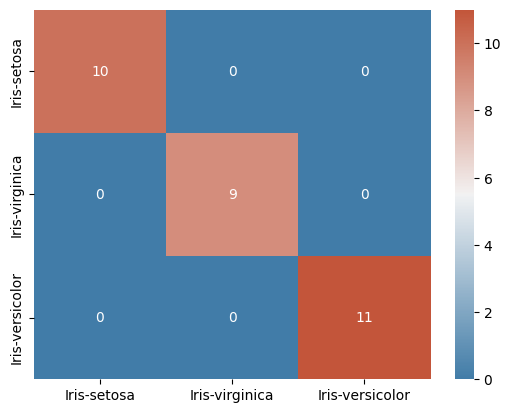

In [ ]:
# Evaluate the RandomForestClassifier using precision, recall and a confusion matrix (NOTE: Accuracy could've been used, but I found it oversimplified).
from sklearn.metrics import precision_score, recall_score, confusion_matrix

p_score = precision_score(y_test, y_pred, average="macro")  # A "macro" average is used over a "weighted" one, as all classes are equal in number and won't skew the score.
print(f"Precision score: {p_score * 100}%")
r_score = recall_score(y_test, y_pred, average="macro")
print(f"Recall score: {r_score * 100}%")

# Convert the 'Species' column to a Python set in order to remove duplicates.
species = list(set(df['Species']))

# Plot the confusion matrix to check how influential each feature was.
conf_mtrx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mtrx, xticklabels=species, yticklabels=species, cmap=c_pal, annot=True)

<Axes: xlabel='Total Features', ylabel='Important Features'>

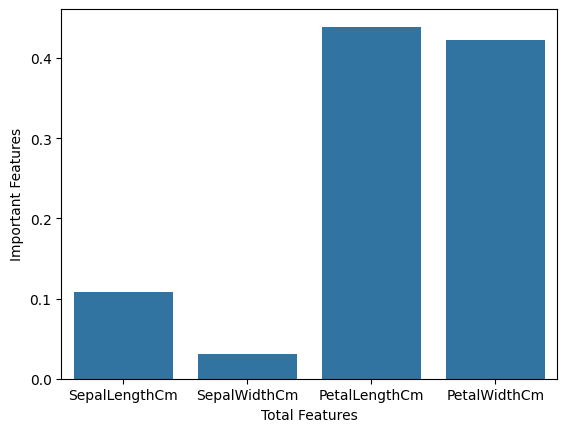

In [ ]:
# Create a feature importance plot to see which features the classifier relied on most.

feat_names = df.columns[:-1]  # Remove the "Species" column as it represents the class labels - as opposed to their features, and therefore isn't of use.

# Convert to dataframe for easier operation.
feat_imp = pd.DataFrame({"Total Features": feat_names,
                         "Important Features": rf_class.feature_importances_
                         })

sns.barplot(data=feat_imp, x="Total Features", y="Important Features")